In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [4]:
df.isna().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


#EDA

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df['y'].value_counts()

,count
y,
no,5572
yes,5289


In [7]:
df.shape

(10861, 17)

In [8]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')


age: [ 59  56  41  55  54  42  60  39  37  34  28  30  36  45  53  38  29  46
  31  35  32  49  43  26  40  33  24  23  48  52  57  51  44  50  27  47
 334  25 123  58  61  62  68  75  22  69  64  66  85  72  90  67  71  21
  63  73  74  65  83  79  70  76  77  19  20  78  95  82  18  86  84  87
  92  81  80  93]
job: ['admin.' 'technician' 'services' 'management' 'retired' 'unemployed'
 'blue-collar' 'entrepreneur' 'housemaid' 'self-employed' 'unknown' nan
 'student']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'unknown' nan 'primary']
default: ['no' 'yes']
balance: [2343.   45. 1270. ... 1874. 4178. 2147.]
housing: ['yes' 'no']
loan: ['no' 'yes' nan]
contact: ['unknown' nan 'cellular' 'telephone']
day: [ 5.  6. nan  7.  8.  9. 12. 13. 14. 15. 16. 19. 20. 21. 23. 26. 27. 28.
 29. 30.  2.  3.  4. 11. 17. 18. 24.  1. 10. 22. 25. 31.]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [1042. 1467. 1389. ... 1611. 118

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


plotting histplot for checking distributions

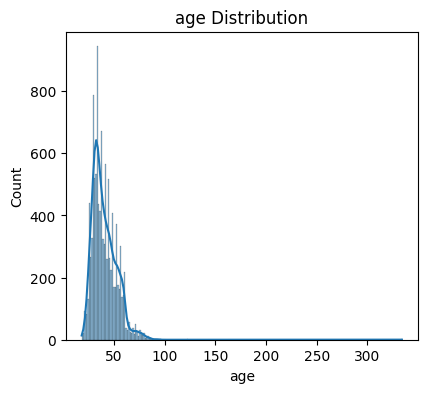

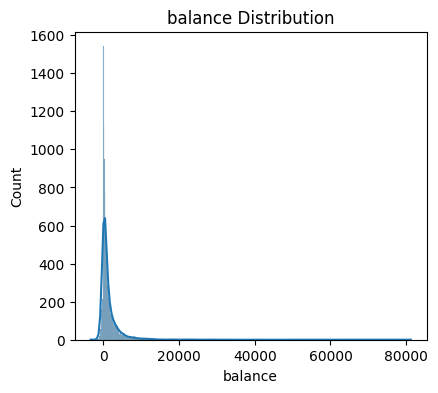

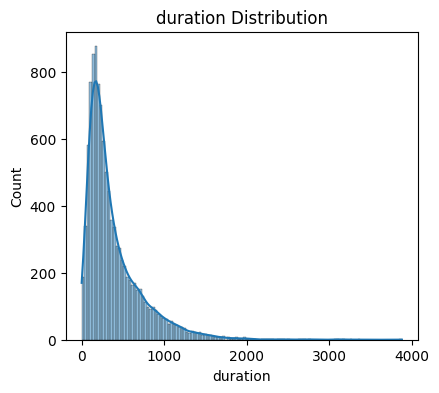

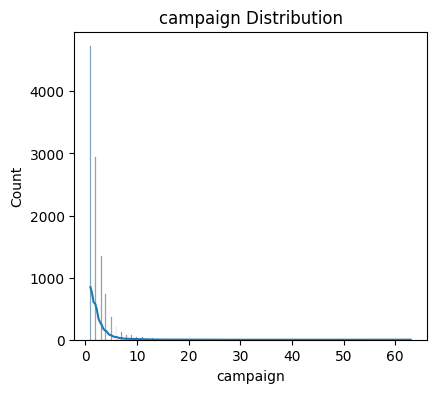

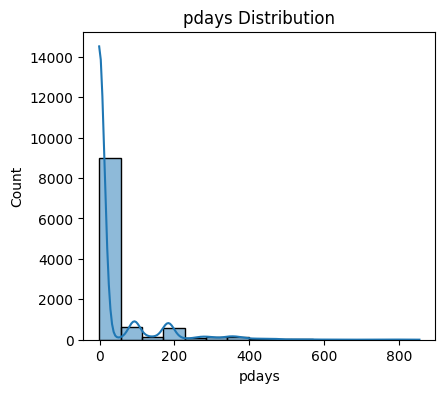

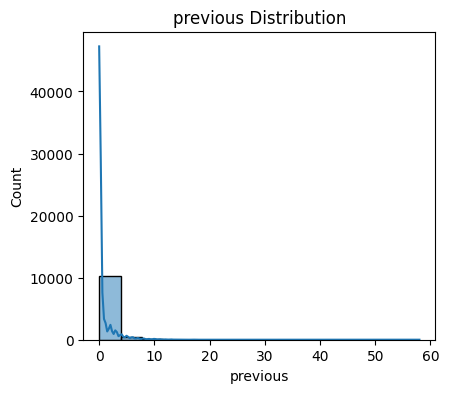

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')



In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

OUTLIERS DETECTION

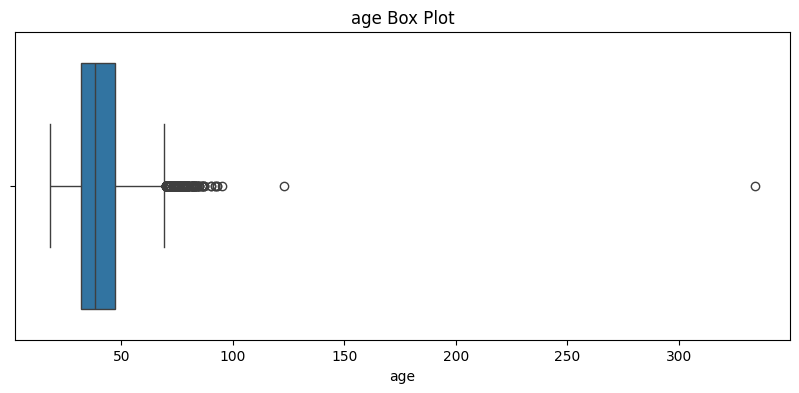

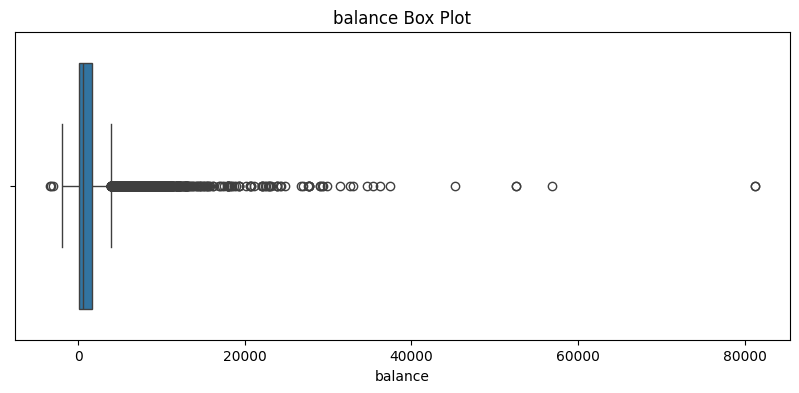

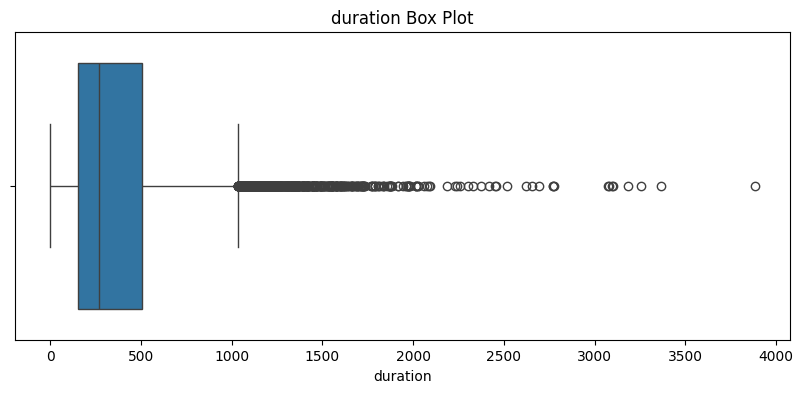

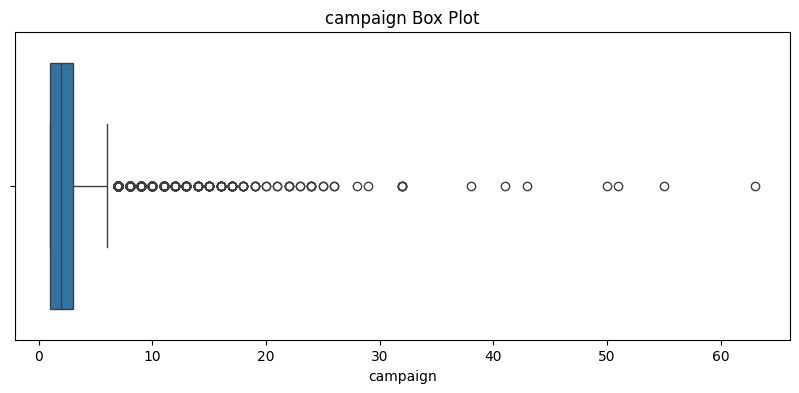

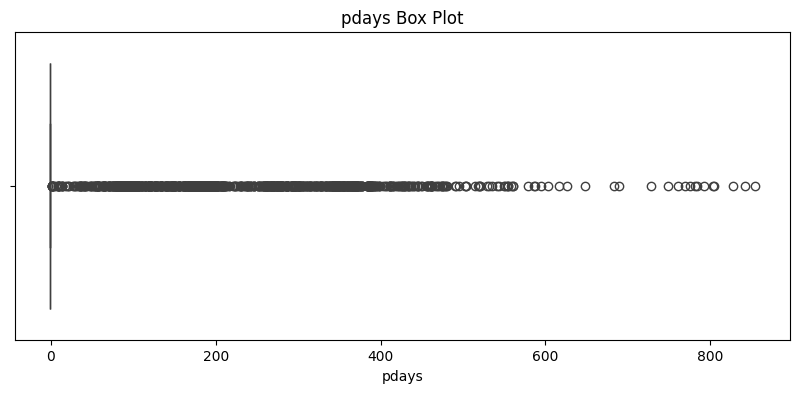

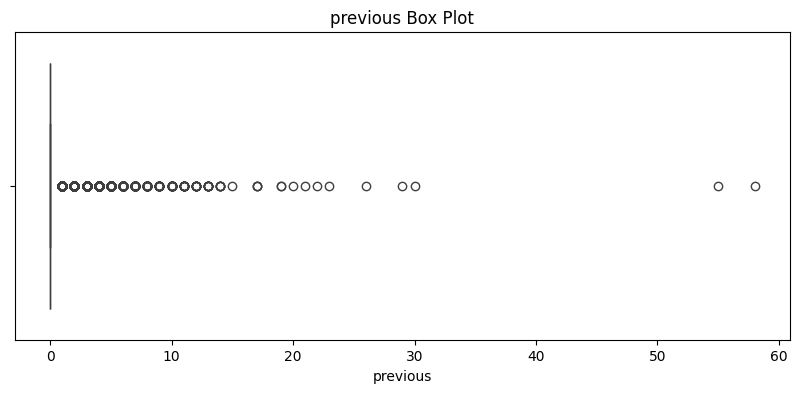

In [12]:
import matplotlib.pyplot as plt
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} Box Plot')
    plt.show()


In [13]:
def calculate_outlier_percentage(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(data)) * 100
    return outlier_percentage


for feature in numerical_features:
    outlier_percent = calculate_outlier_percentage(df, feature)
    print(f'{feature}: {outlier_percent:.2f}% outliers')


age: 2.18% outliers
balance: 9.60% outliers
duration: 5.78% outliers
campaign: 4.81% outliers
pdays: 17.54% outliers
previous: 17.54% outliers


In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [15]:
df['pdays'].unique()

array([ -1.,  nan, 166.,  91., 143., 147., 170., 104., 150., 171., 126.,
       182., 127., 110., 168., 100., 198., 174., 175., 195., 111.,  27.,
       128., 177., 167., 122., 183., 133., 178.,  34.,  10., 163., 135.,
       184., 154.,  99.,  93., 253.,   2., 242., 272., 208.,  73.,  76.,
       269., 160.,  90., 196., 189., 246., 238., 203., 268., 267., 251.,
        92., 262.,   9.,  88.,  85., 243., 210., 200., 257., 264., 101.,
       261., 102., 270., 107., 106., 199., 112.,  41., 294., 121., 231.,
       130., 239., 302., 307., 222., 138., 323., 141., 320., 316., 140.,
       315., 256., 146., 328.,  74., 148., 327., 341., 330., 145., 266.,
       234., 345., 318., 305., 325., 274., 343.,  57., 260., 329., 344.,
       254., 180., 340.,  82., 181., 278., 153.,  81.,   4., 349., 334.,
        87., 176.,  86., 169.,  83.,  79.,   6., 259.,  13., 161., 350.,
        84.,  80., 164., 162.,  22., 296.,  66., 263., 333.,  17.,  89.,
       319.,  78., 286., 337., 364., 188., 258., 35

#HANDLING MISSING VALUES

handling missing values of numerical columns using median


In [16]:


numerical_features = ['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']
for feature in numerical_features:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)


handling missing values of categorical columns using mode imputation

In [17]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for feature in categorical_features:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)

In [18]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


#encoding

In [20]:


binary_columns = []
for col in df.columns:
  unique_values = df[col].unique()
  if len(unique_values) == 2:
    binary_columns.append(col)
print(binary_columns)


['default', 'housing', 'loan', 'y']


label encode in binary columns

In [21]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,0,2343.0,1,0,unknown,5.0,may,1042.0,1,-1.0,0,unknown,1
1,56,admin.,married,secondary,0,45.0,0,0,unknown,5.0,may,1467.0,1,-1.0,0,unknown,1
2,41,technician,married,secondary,0,1270.0,1,0,unknown,5.0,may,1389.0,1,-1.0,0,unknown,1
3,55,services,married,secondary,0,2476.0,1,0,unknown,5.0,may,579.0,1,-1.0,0,unknown,1
4,54,admin.,married,tertiary,0,184.0,0,0,unknown,5.0,may,673.0,2,-1.0,0,unknown,1


In [23]:
df = df.drop('contact', axis=1)

In [24]:


for col in ['job', 'marital', 'education',  'month', 'poutcome']:
  print(f'{col}: {df[col].unique()}')


job: ['admin.' 'technician' 'services' 'management' 'retired' 'unemployed'
 'blue-collar' 'entrepreneur' 'housemaid' 'self-employed' 'unknown'
 'student']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'unknown' 'primary']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'other' 'failure' 'success']


In [25]:
columns_with_unknown = []
for col in df.columns:
  if 'unknown' in df[col].unique():
    columns_with_unknown.append(col)

print(columns_with_unknown)


['job', 'education', 'poutcome']


In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,0,2343.0,1,0,5.0,may,1042.0,1,-1.0,0,unknown,1
1,56,admin.,married,secondary,0,45.0,0,0,5.0,may,1467.0,1,-1.0,0,unknown,1
2,41,technician,married,secondary,0,1270.0,1,0,5.0,may,1389.0,1,-1.0,0,unknown,1
3,55,services,married,secondary,0,2476.0,1,0,5.0,may,579.0,1,-1.0,0,unknown,1
4,54,admin.,married,tertiary,0,184.0,0,0,5.0,may,673.0,2,-1.0,0,unknown,1


ordinal encode

In [27]:

marital_mapping = {'single': 0, 'married': 1, 'divorced': 2}
df['marital'] = df['marital'].map(marital_mapping)

education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education'] = df['education'].map(education_mapping)

poutcome_mapping = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
df['poutcome'] = df['poutcome'].map(poutcome_mapping)


In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,1,2,0,2343.0,1,0,5.0,may,1042.0,1,-1.0,0,0,1
1,56,admin.,1,2,0,45.0,0,0,5.0,may,1467.0,1,-1.0,0,0,1
2,41,technician,1,2,0,1270.0,1,0,5.0,may,1389.0,1,-1.0,0,0,1
3,55,services,1,2,0,2476.0,1,0,5.0,may,579.0,1,-1.0,0,0,1
4,54,admin.,1,3,0,184.0,0,0,5.0,may,673.0,2,-1.0,0,0,1


In [29]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [30]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(month_mapping)

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,1,2,0,2343.0,1,0,5.0,5,1042.0,1,-1.0,0,0,1
1,56,admin.,1,2,0,45.0,0,0,5.0,5,1467.0,1,-1.0,0,0,1
2,41,technician,1,2,0,1270.0,1,0,5.0,5,1389.0,1,-1.0,0,0,1
3,55,services,1,2,0,2476.0,1,0,5.0,5,579.0,1,-1.0,0,0,1
4,54,admin.,1,3,0,184.0,0,0,5.0,5,673.0,2,-1.0,0,0,1


In [32]:
print(df[df['job'] == 'unknown'].shape[0])


49


In [33]:
df = df[df['job'] != 'unknown']


In [34]:
df.shape

(10812, 16)

one hot encode job

In [35]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'unemployed', 'blue-collar', 'entrepreneur', 'housemaid',
       'self-employed', 'student'], dtype=object)

In [36]:
df = pd.get_dummies(df, columns=['job'], prefix=['job'])
df.head()


,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,59,1,2,0,2343.0,1,0,5.0,5,1042.0,...,False,False,False,False,False,False,False,False,False,False
1,56,1,2,0,45.0,0,0,5.0,5,1467.0,...,False,False,False,False,False,False,False,False,False,False
2,41,1,2,0,1270.0,1,0,5.0,5,1389.0,...,False,False,False,False,False,False,False,False,True,False
3,55,1,2,0,2476.0,1,0,5.0,5,579.0,...,False,False,False,False,False,False,True,False,False,False
4,54,1,3,0,184.0,0,0,5.0,5,673.0,...,False,False,False,False,False,False,False,False,False,False


In [37]:
one_hot_columns = [col for col in df.columns if 'job_' in col]

# Replace values in one-hot encoded columns
for col in one_hot_columns:
  df[col] = df[col].apply(lambda x: 1 if x == True else 0)

df.head()


,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,59,1,2,0,2343.0,1,0,5.0,5,1042.0,...,0,0,0,0,0,0,0,0,0,0
1,56,1,2,0,45.0,0,0,5.0,5,1467.0,...,0,0,0,0,0,0,0,0,0,0
2,41,1,2,0,1270.0,1,0,5.0,5,1389.0,...,0,0,0,0,0,0,0,0,1,0
3,55,1,2,0,2476.0,1,0,5.0,5,579.0,...,0,0,0,0,0,0,1,0,0,0
4,54,1,3,0,184.0,0,0,5.0,5,673.0,...,0,0,0,0,0,0,0,0,0,0


#scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataframe
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()


,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0.129747,0.5,0.666667,0.0,0.067572,1.0,0.0,0.133333,0.363636,0.268488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.120253,0.5,0.666667,0.0,0.040402,0.0,0.0,0.133333,0.363636,0.377995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.072785,0.5,0.666667,0.0,0.054886,1.0,0.0,0.133333,0.363636,0.357897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.117089,0.5,0.666667,0.0,0.069145,1.0,0.0,0.133333,0.363636,0.149188,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.113924,0.5,1.000000,0.0,0.042045,0.0,0.0,0.133333,0.363636,0.173409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_scaled['y'].value_counts()

,count
y,
0.0,5557
1.0,5255


# feature selection

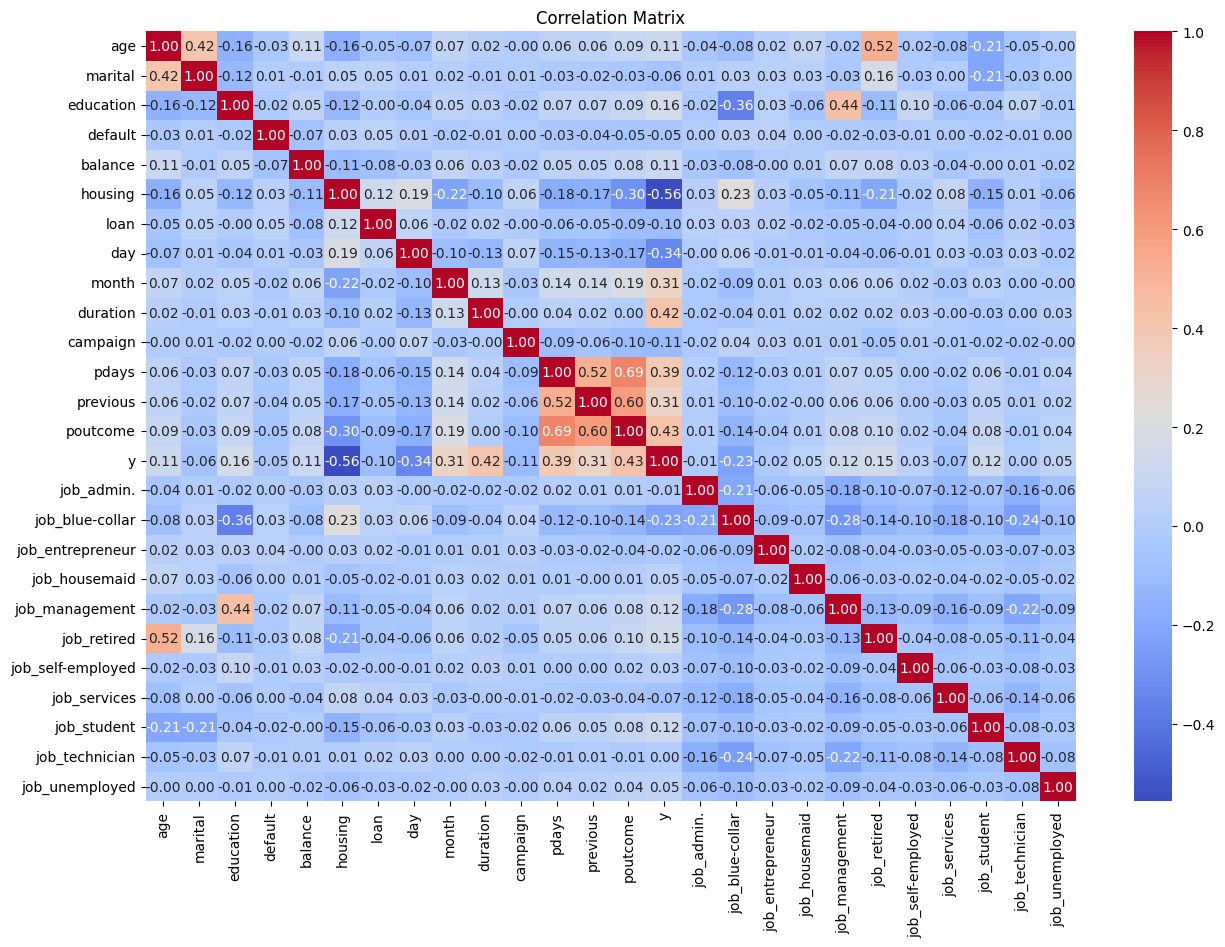

poutcome          0.431152
duration          0.421994
pdays             0.387701
month             0.313471
previous          0.311632
education         0.155244
job_retired       0.148969
job_management    0.122651
job_student       0.119634
age               0.114922
Name: y, dtype: float64


In [41]:


import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Get the correlation with the target column 'y'
corr_with_y = correlation_matrix['y'].sort_values(ascending=False)

# Print the top 10 highly correlated columns
print(corr_with_y[1:11])


#model training

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target variable
X = df_scaled.drop('y', axis=1)
y = df_scaled['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9690245030050856
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1101
         1.0       0.97      0.97      0.97      1062

    accuracy                           0.97      2163
   macro avg       0.97      0.97      0.97      2163
weighted avg       0.97      0.97      0.97      2163

Confusion Matrix:
[[1067   34]
 [  33 1029]]


In [44]:
y_pred

array([1., 0., 0., ..., 0., 1., 0.])

hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9644012944983819
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      1101
         1.0       0.96      0.97      0.96      1062

    accuracy                           0.96      2163
   macro avg       0.96      0.96      0.96      2163
weighted avg       0.96      0.96      0.96      2163

Confusion Matrix:
[[1060   41]
 [  36 1026]]
